imports

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import seaborn as sns

/tmp/ipykernel_9862/756278191.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_9862/756278191.py:8: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import spearmanr


In [6]:
df = pd.read_csv("read_bytes.csv", parse_dates=['Time'], index_col='Time')
df.columns = [
    'openeuler_home_bytes',
    'openeuler_root_bytes',
    'openeuler_swap_bytes',
    'sda_total_bytes'
]
print(df.head())

                     openeuler_home_bytes  openeuler_root_bytes  \
Time                                                              
2025-04-28 17:28:00                     0              11591680   
2025-04-28 17:28:15                     0              11591680   
2025-04-28 17:28:30                     0                823296   
2025-04-28 17:28:45               1761280                823296   
2025-04-28 17:29:00               1761280                823296   

                     openeuler_swap_bytes  sda_total_bytes  
Time                                                        
2025-04-28 17:28:00                  4096         32911360  
2025-04-28 17:28:15                  4096         13074432  
2025-04-28 17:28:30                  4096         13074432  
2025-04-28 17:28:45                 57344         13074432  
2025-04-28 17:29:00                 57344         13074432  


# plotting different time series

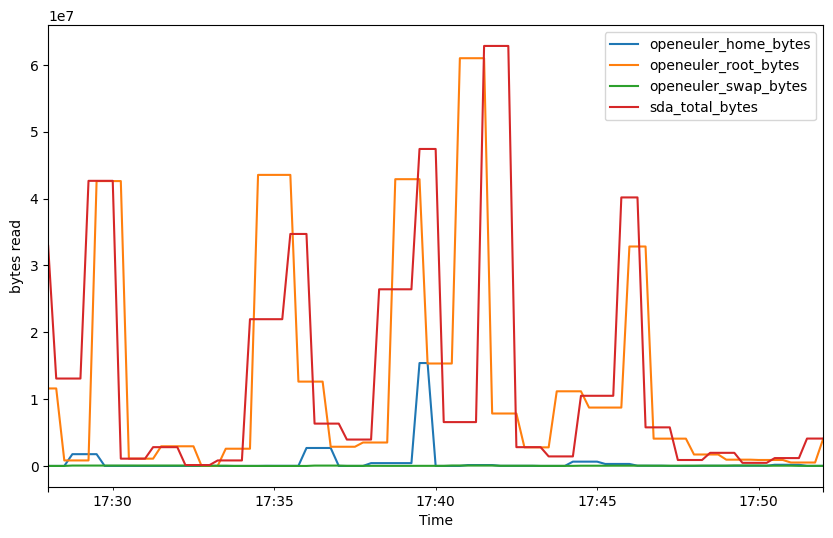

In [15]:
ax = df.plot(figsize=(10,6))
ax.set_ylabel('bytes read')
plt.show()

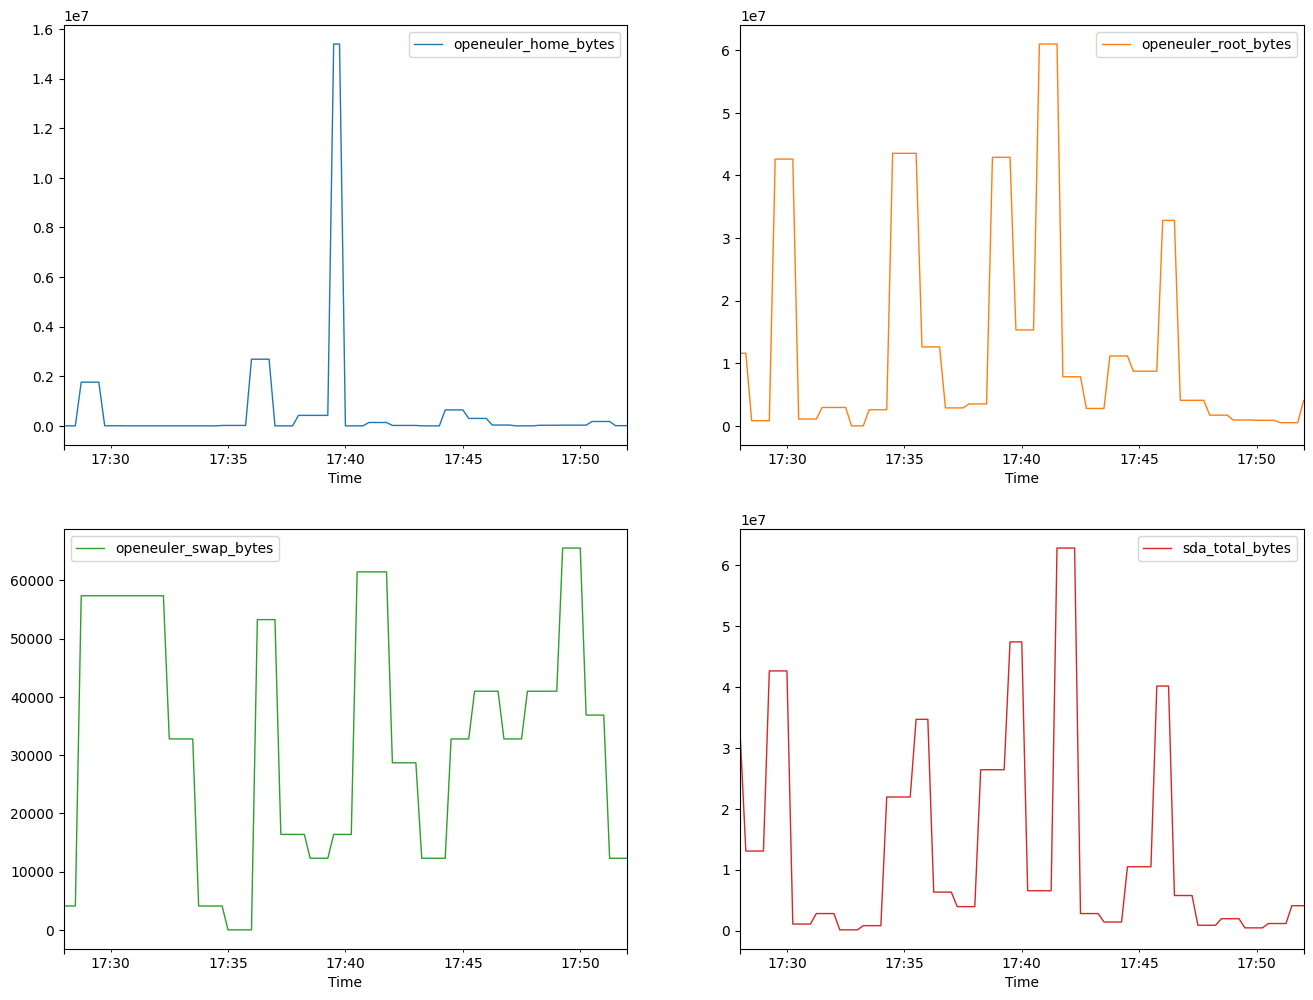

In [18]:
df.plot(subplots=True,
        linewidth=1,
        layout=(2,2),
        figsize=(16,12),
        sharex=False,
        sharey=False)
plt.show()

# Find relationship between multiple time series

In [19]:
# Pearson correlation matrix
corr_p = df[['openeuler_home_bytes', 'openeuler_root_bytes', 'openeuler_swap_bytes', 'sda_total_bytes']].corr(method='pearson')
print('\nPearson correlation matrix')
print(corr_p)

# Spearman correlation matrix'
corr_s = df[['openeuler_home_bytes', 'openeuler_root_bytes', 'openeuler_swap_bytes', 'sda_total_bytes']].corr(method='spearman')
print('\nSpearman correlation matrix')
print(corr_s)



Pearson correlation matrix
                      openeuler_home_bytes  openeuler_root_bytes  \
openeuler_home_bytes              1.000000              0.127930   
openeuler_root_bytes              0.127930              1.000000   
openeuler_swap_bytes             -0.070092             -0.008259   
sda_total_bytes                   0.308917              0.446361   

                      openeuler_swap_bytes  sda_total_bytes  
openeuler_home_bytes             -0.070092         0.308917  
openeuler_root_bytes             -0.008259         0.446361  
openeuler_swap_bytes              1.000000        -0.111130  
sda_total_bytes                  -0.111130         1.000000  

Spearman correlation matrix
                      openeuler_home_bytes  openeuler_root_bytes  \
openeuler_home_bytes              1.000000              0.182044   
openeuler_root_bytes              0.182044              1.000000   
openeuler_swap_bytes              0.119549             -0.150759   
sda_total_bytes     

<Axes: >

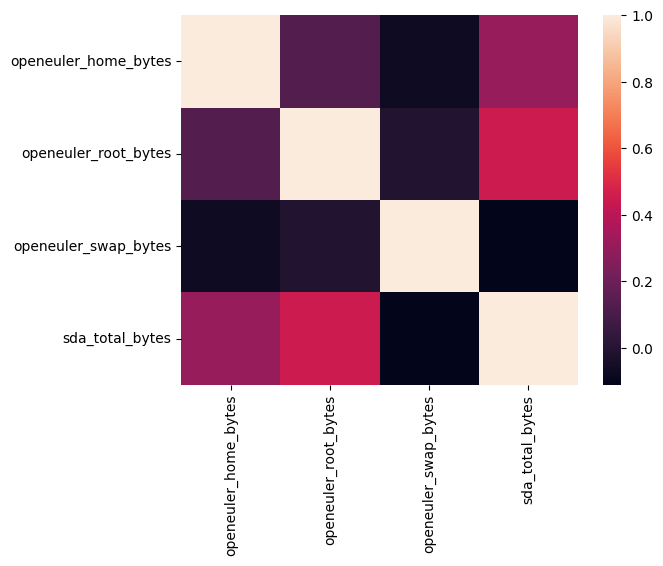

In [26]:
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat)

                      openeuler_home_bytes  openeuler_root_bytes  \
openeuler_home_bytes              1.000000              0.182044   
openeuler_root_bytes              0.182044              1.000000   
openeuler_swap_bytes              0.119549             -0.150759   
sda_total_bytes                   0.408270              0.627200   

                      openeuler_swap_bytes  sda_total_bytes  
openeuler_home_bytes              0.119549         0.408270  
openeuler_root_bytes             -0.150759         0.627200  
openeuler_swap_bytes              1.000000        -0.186862  
sda_total_bytes                  -0.186862         1.000000  


<Axes: >

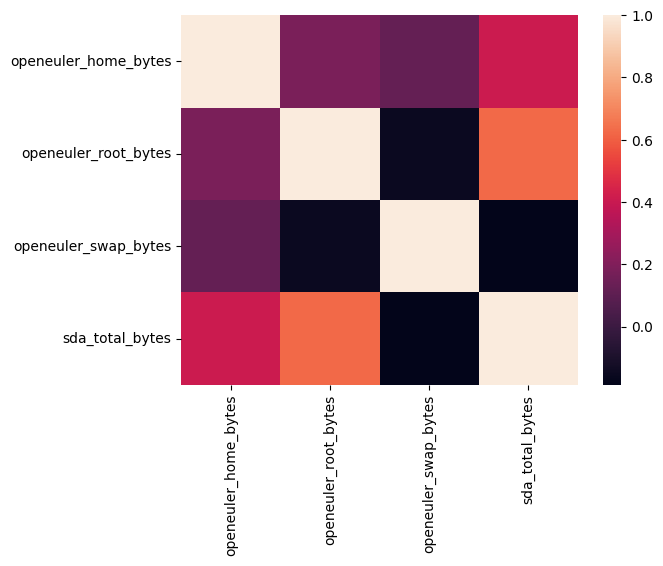

In [27]:
corr_mat_spearman = df.corr(method='spearman')
print(corr_mat_spearman)
sns.heatmap(corr_mat_spearman)